In [47]:
install.packages("LaplacesDemon")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [119]:
install.packages("nortest")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [139]:
install.packages("fGarch")

also installing the dependencies ‘MASS’, ‘spatial’, ‘gss’, ‘stabledist’, ‘lattice’, ‘timeDate’, ‘timeSeries’, ‘fBasics’, ‘fastICA’, ‘Matrix’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [149]:
install.packages("mAr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [150]:
install.packages("urca")
install.packages("egcm")

also installing the dependency ‘nlme’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘colorspace’, ‘assertthat’, ‘fansi’, ‘utf8’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘cli’, ‘pillar’, ‘gtable’, ‘lazyeval’, ‘mgcv’, ‘plyr’, ‘reshape2’, ‘rlang’, ‘scales’, ‘tibble’, ‘viridisLite’, ‘withr’, ‘quadprog’, ‘TTR’, ‘curl’, ‘zoo’, ‘xts’, ‘ggplot2’, ‘tseries’, ‘pracma’, ‘quantmod’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [190]:
install.packages("vars")

also installing the dependencies ‘strucchange’, ‘lmtest’, ‘sandwich’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


# Задание 0

In [42]:
data<-read.csv('Data/Task0.csv')

In [140]:
head(data)

y,x1,x2,x3,X
3.3284897,0.4067366,0.08480592,0.05924063,NA
3.2330760,0.7431448,0.16900082,0.11827317,NA
0.8454259,0.9510565,0.25197806,0.17689028,NA
1.6290471,0.9945219,0.33313979,0.23488605,NA
0.8606992,0.8660254,0.41190125,0.29205677,NA
1.0059526,0.5877853,0.48769494,0.34820164,NA


Экспоненциальное распределение

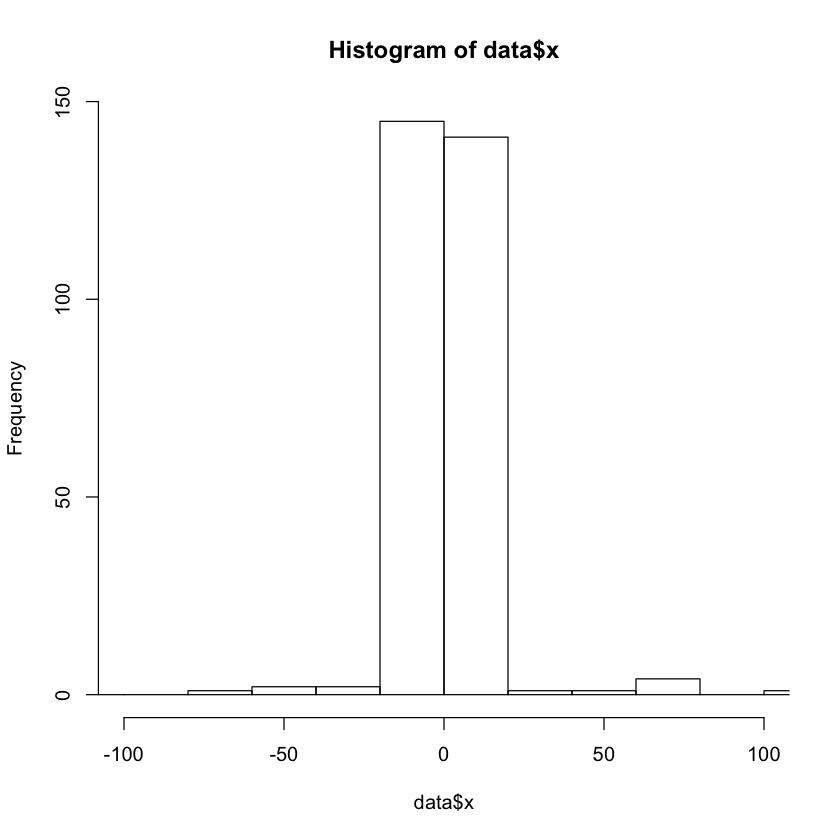

In [19]:
hist(data$x, xlim=c(-100,100), breaks=20)

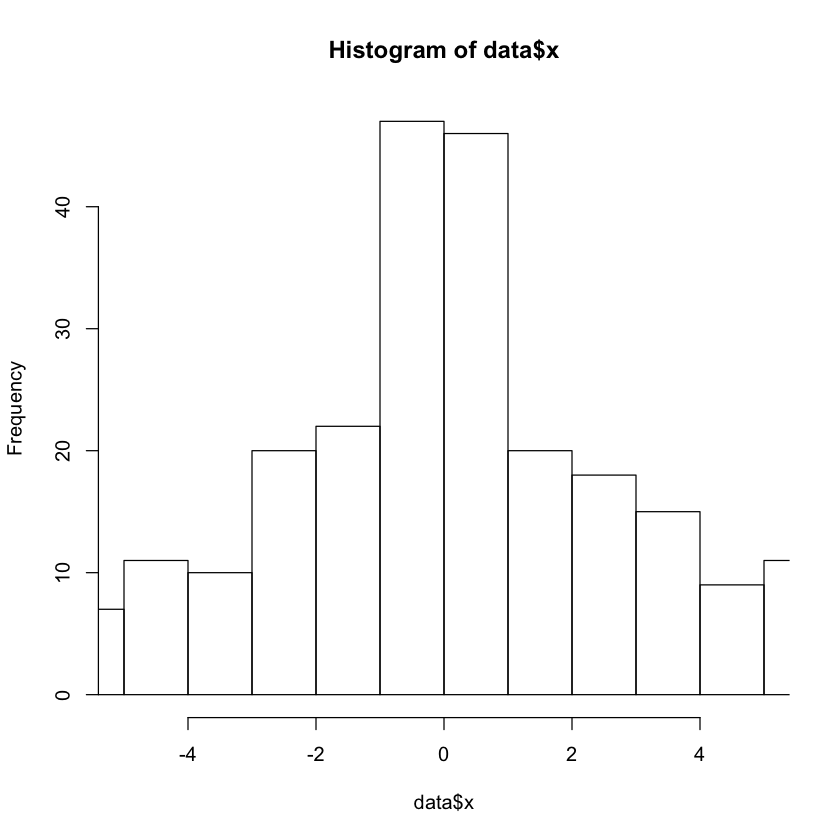

In [25]:
hist(data$x, xlim=c(-5,5), breaks=500)

## Разбиваем выборку 

In [26]:
set.seed(1337)

In [27]:
n <- nrow(data)

In [28]:
idx <- sample.int(n = nrow(data), size = floor(.5 * n), replace = F)

In [29]:
train <- data[idx, ]
test  <- data[-idx, ]

In [30]:
n <- n / 2
mean <- mean(train)
var <- var(train)

In [48]:
library(LaplacesDemon)

In [67]:
lap_beta <- mean
print(lap_beta)
lap_alpha <- sqrt(2 / var) #scale parameter / масштаб
print(lap_alpha)

[1] -1.683055
[1] 0.0511346


## Критерий Колмогорова-Смирнова

### Лаплас

In [88]:
ks.test(train, "plaplace", lap_beta ,lap_alpha)


	One-sample Kolmogorov-Smirnov test

data:  train
D = 0.6814, p-value < 2.2e-16
alternative hypothesis: two-sided


In [89]:
ks.test(test, "plaplace", lap_beta ,lap_alpha)


	One-sample Kolmogorov-Smirnov test

data:  test
D = 0.68136, p-value < 2.2e-16
alternative hypothesis: two-sided


### Стьюдент ( n - число степеней свободы)

In [86]:
ks.test(test, "pt", 1)


	One-sample Kolmogorov-Smirnov test

data:  test
D = 0.15101, p-value = 0.002137
alternative hypothesis: two-sided


In [90]:
ks.test(test, "pt", 2)


	One-sample Kolmogorov-Smirnov test

data:  test
D = 0.2068, p-value = 5.362e-06
alternative hypothesis: two-sided


In [91]:
ks.test(test, "pt", 3)


	One-sample Kolmogorov-Smirnov test

data:  test
D = 0.22884, p-value = 3.006e-07
alternative hypothesis: two-sided


# Задание 1 (на основе лекции #5)

In [93]:
data<-read.csv('Data/Task1.csv')

In [94]:
head(data)

y,x1,x2,x3,X
3.3284897,0.4067366,0.08480592,0.05924063,NA
3.2330760,0.7431448,0.16900082,0.11827317,NA
0.8454259,0.9510565,0.25197806,0.17689028,NA
1.6290471,0.9945219,0.33313979,0.23488605,NA
0.8606992,0.8660254,0.41190125,0.29205677,NA
1.0059526,0.5877853,0.48769494,0.34820164,NA


In [97]:
regr <-  lm(data$y ~ data$x1 + data$x2 + data$x3, data=data)
summary(regr)


Call:
lm(formula = data$y ~ data$x1 + data$x2 + data$x3, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1749 -1.4830  0.1169  1.5436  2.8456 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.23988    0.12696   1.890   0.0603 .  
data$x1      1.91461    0.17766  10.777  < 2e-16 ***
data$x2      1.09018    0.18271   5.967 1.11e-08 ***
data$x3     -0.01621    0.17682  -0.092   0.9270    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.783 on 196 degrees of freedom
Multiple R-squared:  0.434,	Adjusted R-squared:  0.4254 
F-statistic:  50.1 on 3 and 196 DF,  p-value: < 2.2e-16


In [100]:
regr_imp <- lm(data$y ~ data$x1 + data$x2 - 1, data = data)
summary(regr_imp)


Call:
lm(formula = data$y ~ data$x1 + data$x2 - 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9623 -1.2700  0.3612  1.7732  3.0957 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
data$x1   1.9248     0.1783  10.797  < 2e-16 ***
data$x2   1.1287     0.1801   6.267 2.26e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.79 on 198 degrees of freedom
Multiple R-squared:  0.4368,	Adjusted R-squared:  0.4311 
F-statistic: 76.78 on 2 and 198 DF,  p-value: < 2.2e-16


## Исследование остатков модели

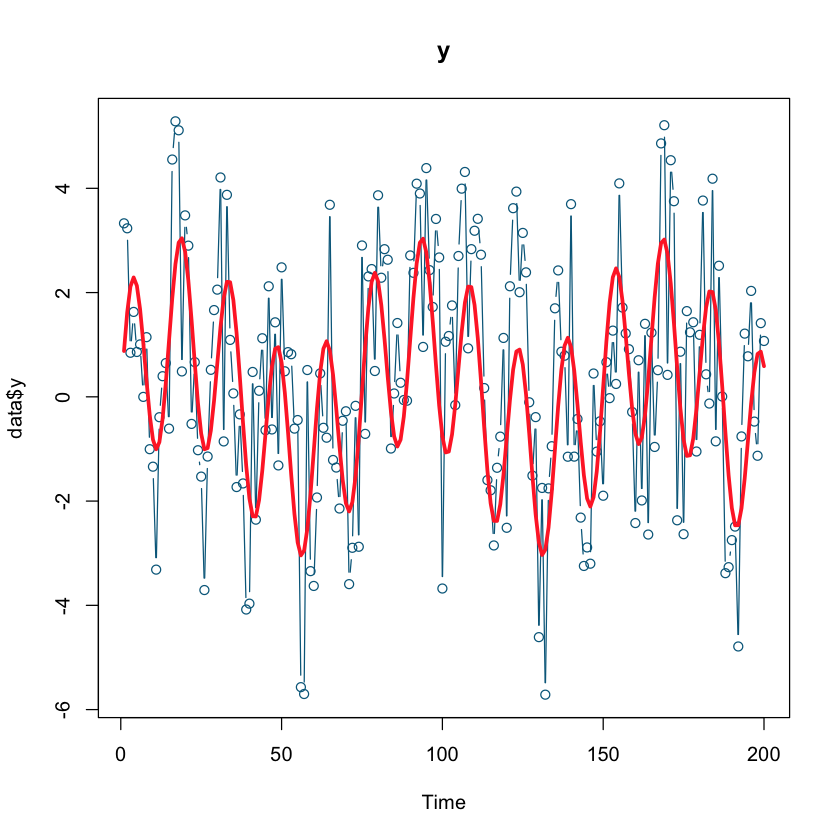

In [101]:
plot(data$y,type = "b",col='deepskyblue4',xlab='Time',main='y')
lines(regr_imp$fitted.values,col='firebrick1',lwd=3)

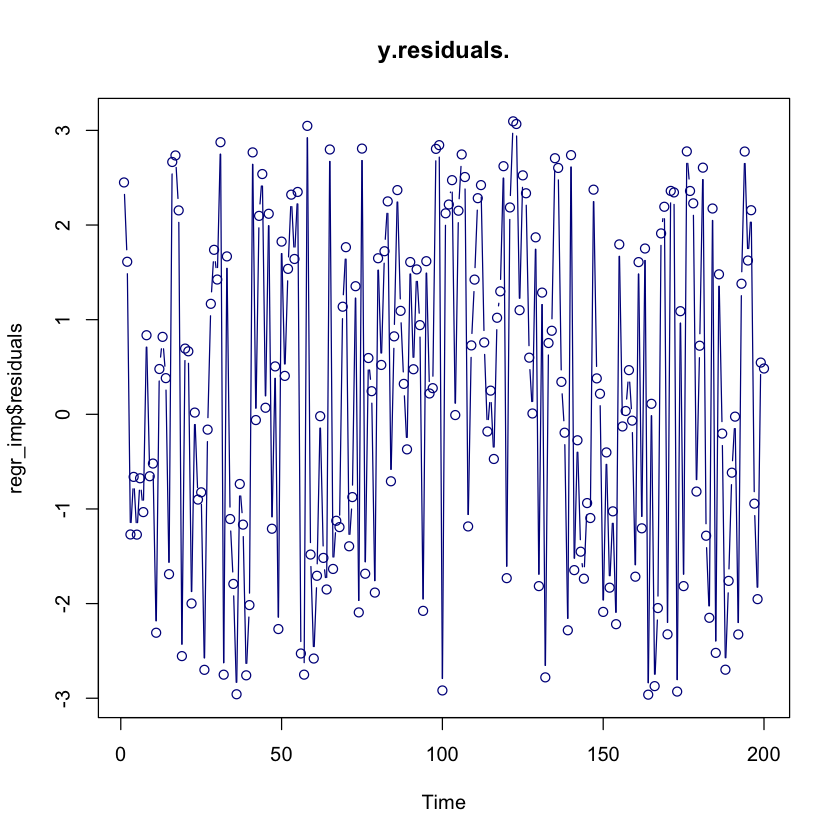

In [102]:
#Остатки
plot(regr_imp$residuals ,type = "b",col='blue4',xlab='Time',main='y.residuals.')

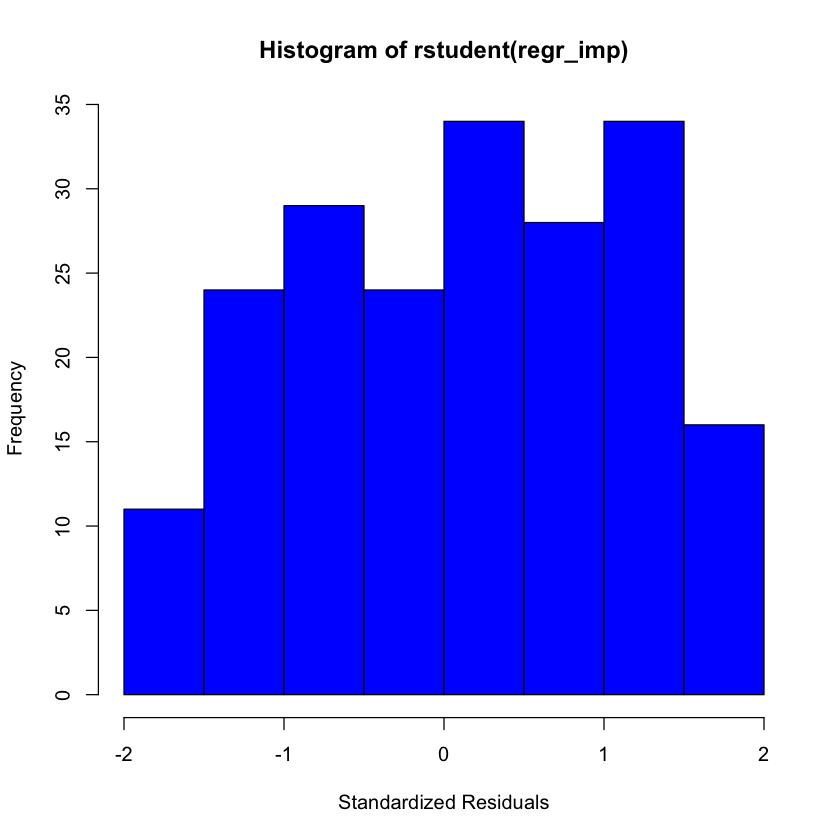

In [103]:
hist(rstudent(regr_imp),xlab='Standardized Residuals', col = "blue")

In [104]:
interest_residuals = rstudent(regr_imp)

Для оценки нормальности построим Q-Q plot (quantile-quantile)


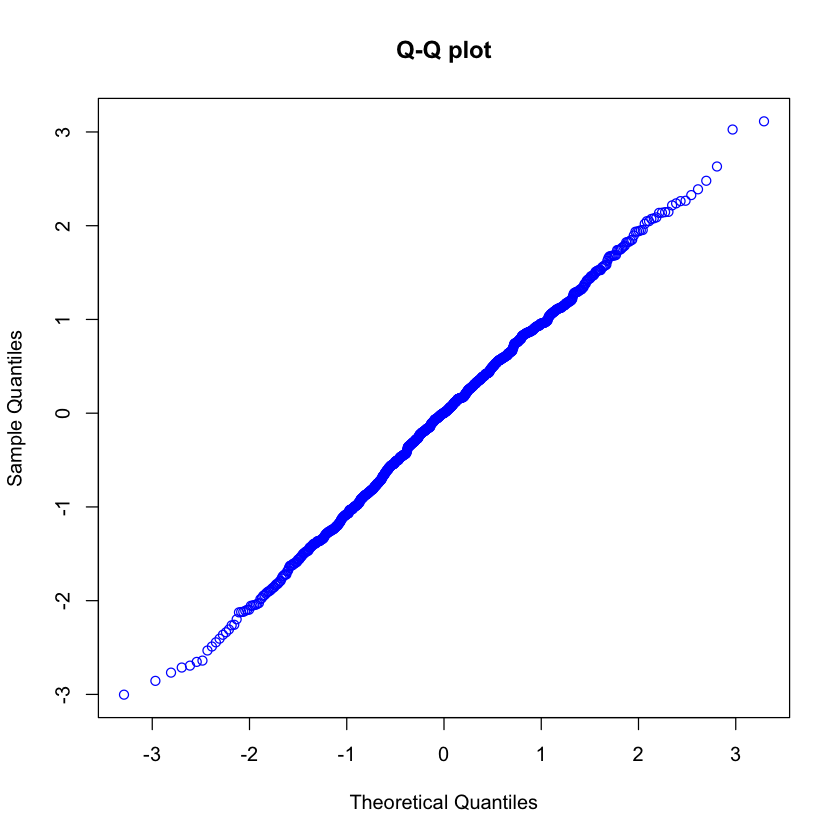

In [133]:
r <- rnorm(1000)
qqnorm(r,col="blue", main = "Q-Q plot" )

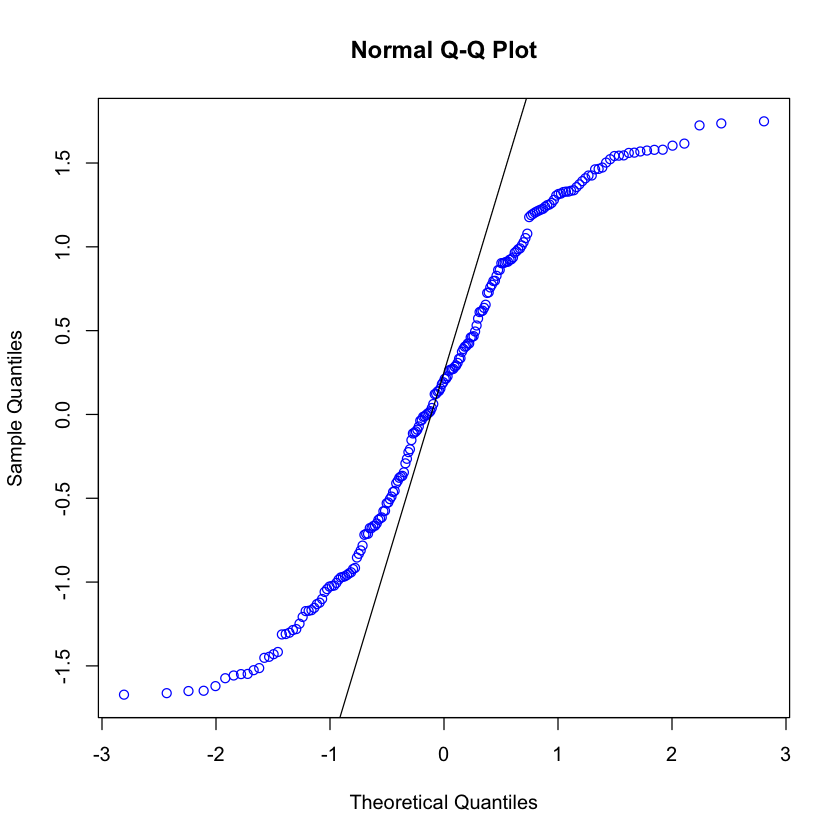

In [113]:
qqnorm(interest_residuals,col="blue")
qqline(regr_imp$residuals)

Видим из-за изгибов "легкие" концы 

In [115]:
mu = mean(interest_residuals)
mu

[1] 0.1330695

In [117]:
sigma2 = sd(interest_residuals)
sigma2

[1] 0.9956948

## Shapiro-Wilk

In [120]:
library(nortest)

Воспользуемся тестом Шапиро-Уилка для проверки остатков на нормальность

In [121]:
shapiro.test(rstudent(regr_imp))


	Shapiro-Wilk normality test

data:  rstudent(regr_imp)
W = 0.94707, p-value = 9.938e-07


Т.к. p-value < 0.05, то гипотезу о нормальной распредленности следует отвергнуть

## Тест Колмогорова-Смирнова

In [122]:
resid = regr_imp$residuals
ks.test(resid, "pnorm", mu, sigma2)


	One-sample Kolmogorov-Smirnov test

data:  resid
D = 0.24077, p-value = 1.7e-10
alternative hypothesis: two-sided


Т.к. p-value < 0.05, то гипотезу о нормальной распределенности следует отвергнуть

In [123]:
ks.test(resid, "punif", min(resid), max(resid))


	One-sample Kolmogorov-Smirnov test

data:  resid
D = 0.065374, p-value = 0.3598
alternative hypothesis: two-sided


Т.к. p-value > 0.05, то гипотезу о равномерной распредленности следует принять

### Автокорреляционная функция остатков

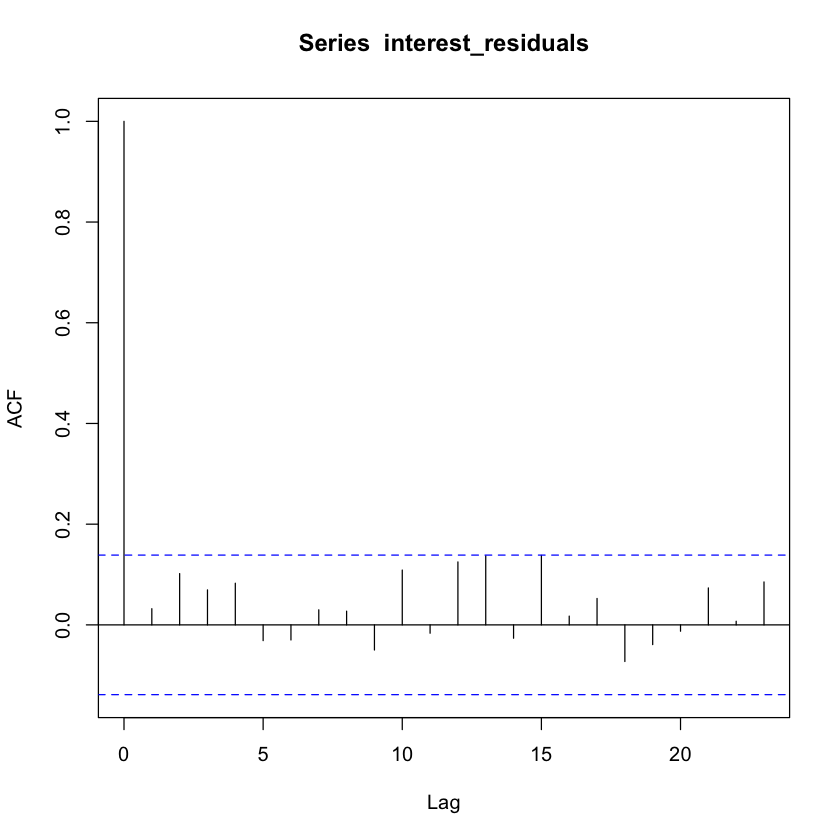

In [128]:
acf(interest_residuals)

В остатках может быть белый шум, т.к. значение лежит в пределах $$[-\sqrt{1/n},\,+\sqrt{1/n}]$$ 


## Проверим распределение шума

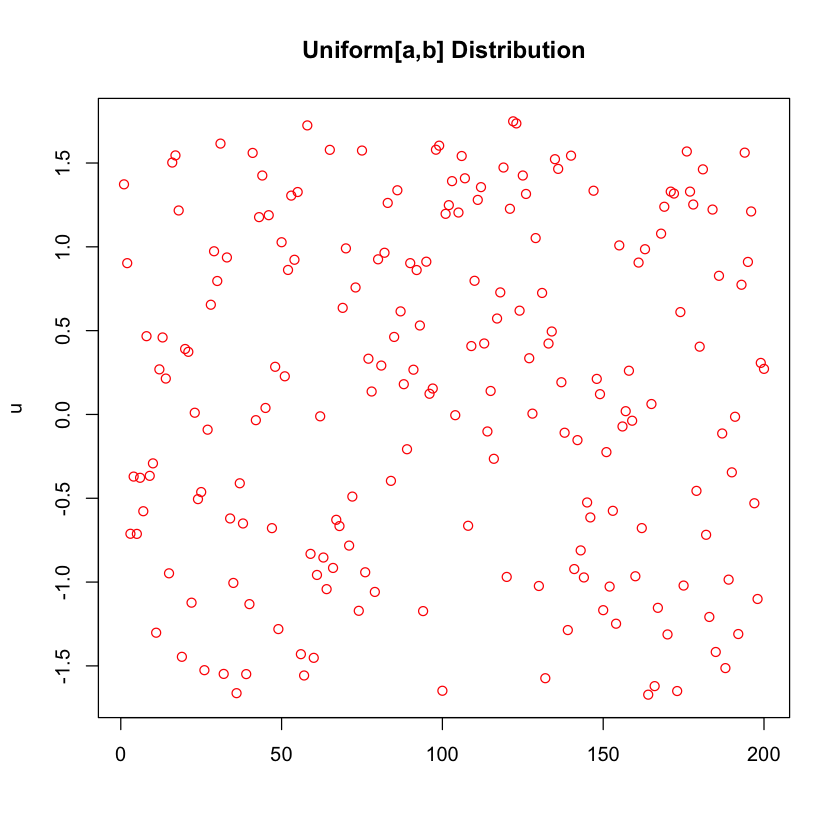


	One-sample Kolmogorov-Smirnov test

data:  u
D = 0.065556, p-value = 0.3564
alternative hypothesis: two-sided


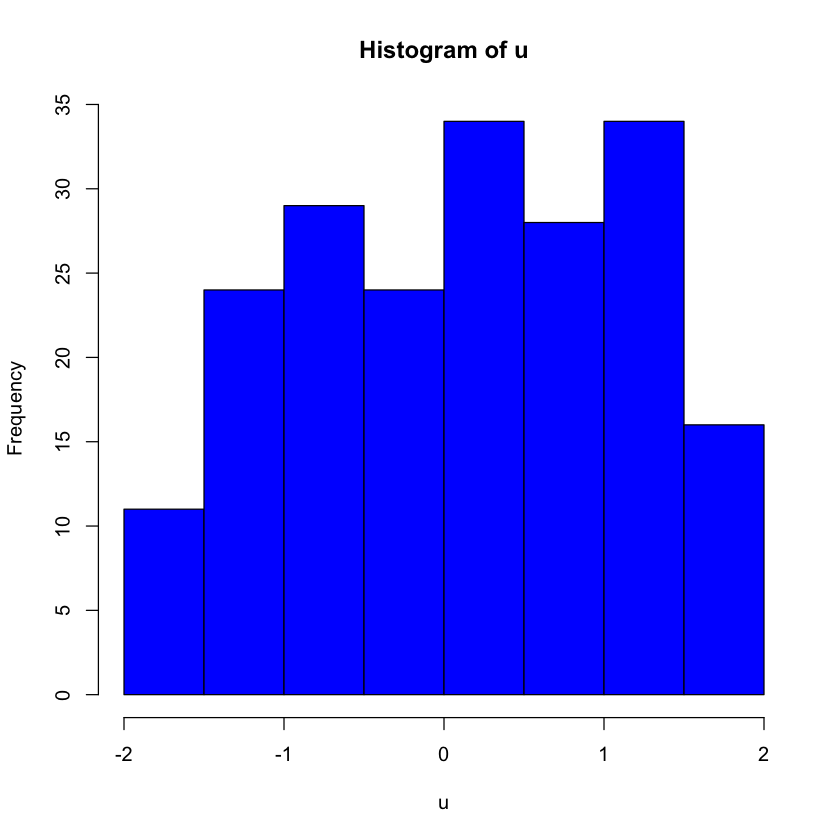

In [147]:
u=interest_residuals
matplot(u,type="p",pch=21,main = "Uniform[a,b] Distribution",col = "red")
hist(u,col = "blue")
ks.test(u, "punif", min(u),max(u))

#### Принимаем равномерное

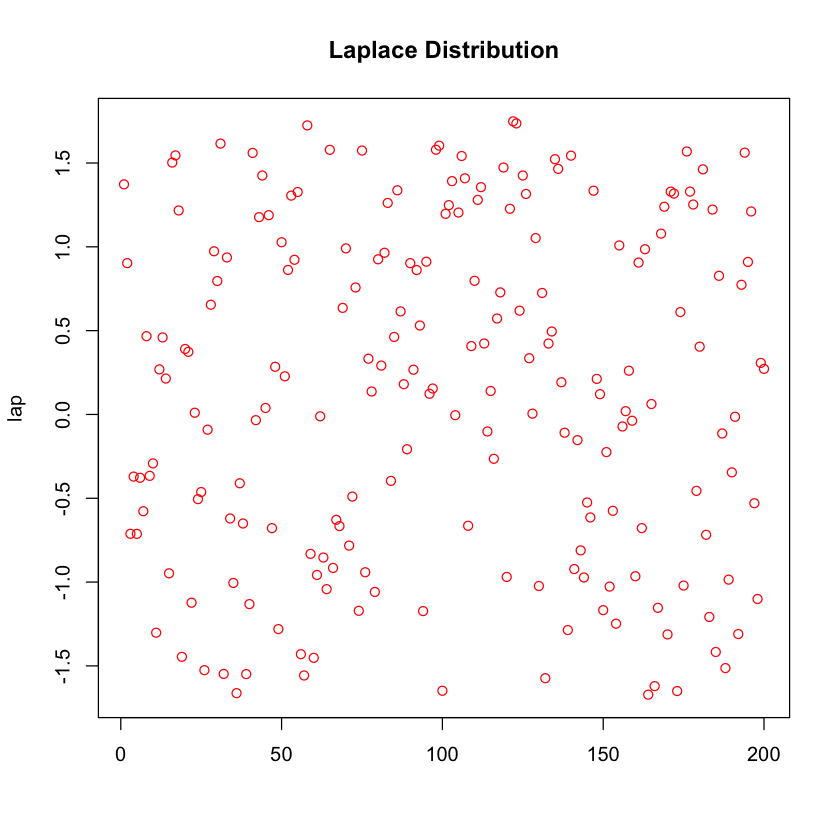


	One-sample Kolmogorov-Smirnov test

data:  lap
D = 0.15371, p-value = 0.0001572
alternative hypothesis: two-sided


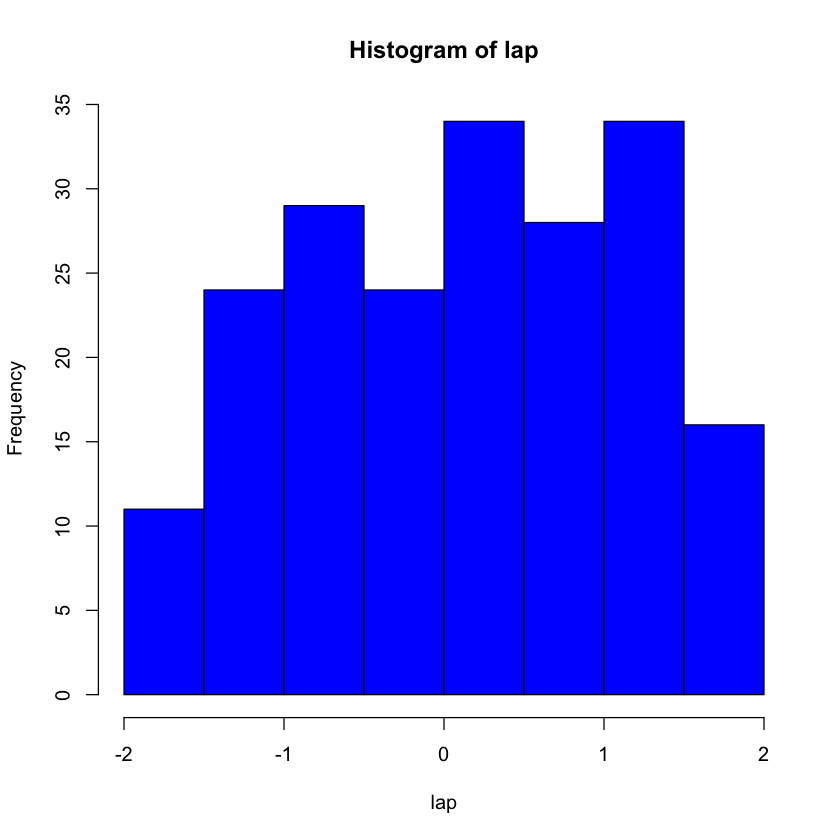

In [146]:
lap = interest_residuals
lap_alpha <- sqrt(2 / sigma2)
matplot(lap,type="p",pch=21,main = "Laplace Distribution",col = "red")
hist(lap,col = "blue")
ks.test(lap, "plaplace",0,lap_alpha)

Отвергается

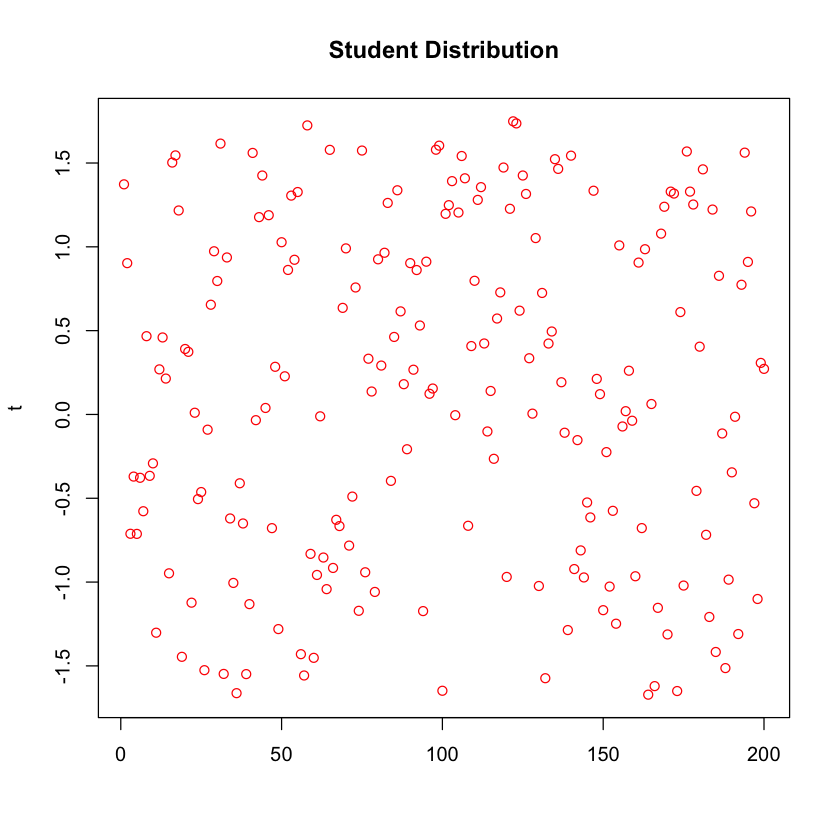


	One-sample Kolmogorov-Smirnov test

data:  t
D = 0.13647, p-value = 0.001163
alternative hypothesis: two-sided


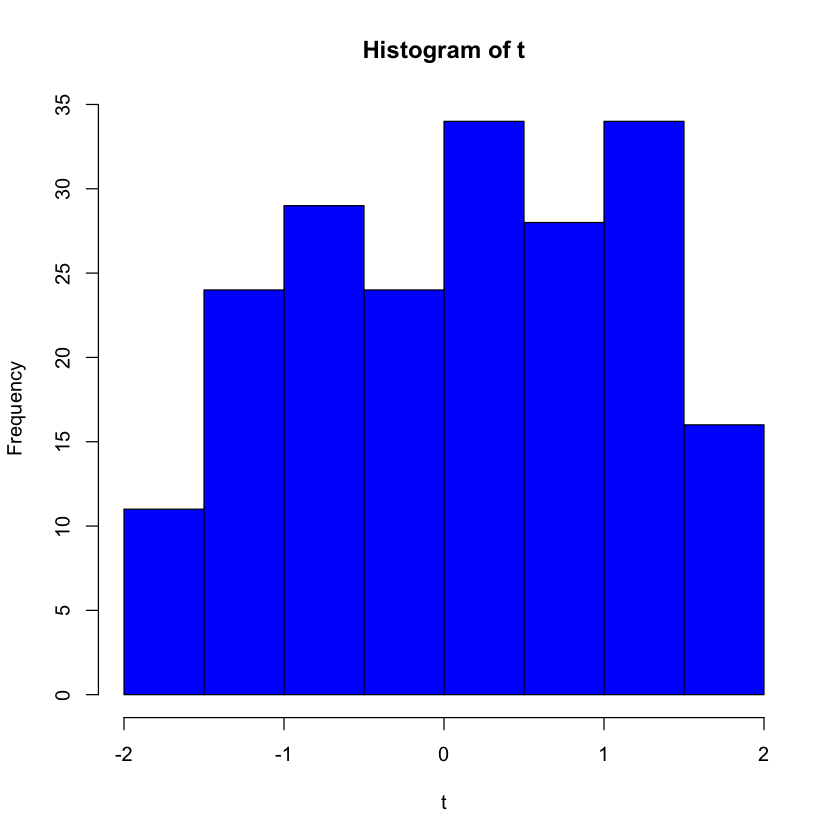

In [148]:
# t-распределение Стьюдента
library(fGarch)
t = interest_residuals
matplot(t,type="p",pch=21,main = "Student Distribution", col = "red")
hist(t,col = "blue")
ks.test(t, "psstd",mu,sigma2)

Отвергается

# Задание 4

In [151]:
library(urca)
library(egcm)
library(mAr)

Loading required package: zoo

Attaching package: ‘zoo’

The following object is masked from ‘package:timeSeries’:

    time<-

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: xts
Loading required package: MASS


## Data

In [156]:
#модель векторной авторегресии
phi1 = c(0.2, 0, 0.1)
phi1 = rbind(phi1, c(0, 0, 0.3))
phi1 = rbind(phi1, c(0.5, 0, 0))
print(phi1)

phi2 = c(0.2, 0.1, 0.1)
phi2 = rbind(phi2, c(0.1, 0.1, 0.1))
phi2 = rbind(phi2, c(0.2, 0.2, -0.2))
print(phi2)

phi3 = c(0.15, 0.15, 0)
phi3 = rbind(phi3, c(0.2, 0, 0.2))
phi3 = rbind(phi3, c(0.15, 0.15, 0))
print(phi3)

     [,1] [,2] [,3]
phi1  0.2    0  0.1
      0.0    0  0.3
      0.5    0  0.0
     [,1] [,2] [,3]
phi2  0.2  0.1  0.1
      0.1  0.1  0.1
      0.2  0.2 -0.2
     [,1] [,2] [,3]
phi3 0.15 0.15  0.0
     0.20 0.00  0.2
     0.15 0.15  0.0


In [155]:
#ковариационная матрица шума
sigma = c(1,0,0)
sigma = rbind(sigma, c(0, 2, 0))
sigma = rbind(sigma, c(0, 0, 4))
C = sigma
sigma

sigma,1,0,0
,0,2,0
,0,0,4


In [153]:
#вектор средних
a = c(0, 2, 6)
w = a 
w

[1] 0 2 6

# 1. Проверить яляется ли векторный процесс стационарным;

In [157]:
phi <- cbind(phi1,phi2, phi3 )
phi

phi1,0.2,0,0.1,0.2,0.1,0.1,0.15,0.15,0.0
,0.0,0,0.3,0.1,0.1,0.1,0.20,0.00,0.2
,0.5,0,0.0,0.2,0.2,-0.2,0.15,0.15,0.0


In [158]:
omega = diag(c(1,2,4))
omega

1,0,0
0,2,0
0,0,4


In [160]:
I <- diag(c(1,1,1))
Zero <- diag(c(0,0,0))
IZ = cbind(I, Zero)
IZZ <- cbind(I,Zero,  Zero)
ZIZ = cbind(Zero, I, Zero)
F <- rbind(phi,IZZ, ZIZ)
F

phi1,0.2,0,0.1,0.2,0.1,0.1,0.15,0.15,0.0
,0.0,0,0.3,0.1,0.1,0.1,0.20,0.00,0.2
,0.5,0,0.0,0.2,0.2,-0.2,0.15,0.15,0.0
,1.0,0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
,0.0,1,0.0,0.0,0.0,0.0,0.00,0.00,0.0
,0.0,0,1.0,0.0,0.0,0.0,0.00,0.00,0.0
,0.0,0,0.0,1.0,0.0,0.0,0.00,0.00,0.0
,0.0,0,0.0,0.0,1.0,0.0,0.00,0.00,0.0
,0.0,0,0.0,0.0,0.0,1.0,0.00,0.00,0.0


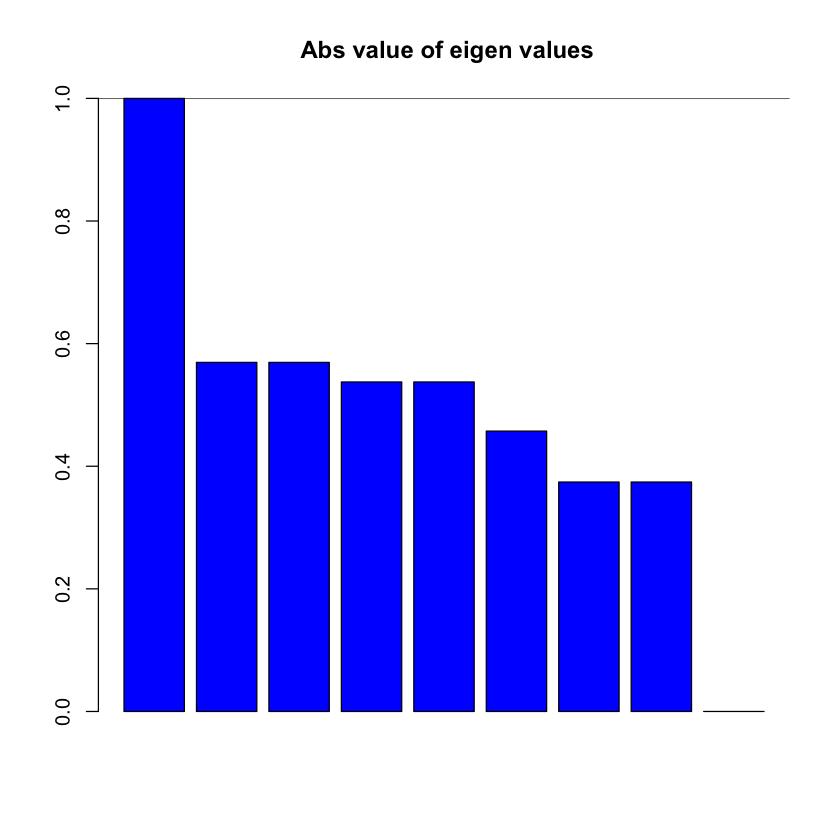

In [161]:
eval <- eigen(F,only.values= TRUE)
modev <- Mod(eval$values)
barplot(modev,col = "blue",main = " Abs value of eigen values")
abline(h=1,col = "black")

### 1.1 Если векторный процесс не стационарный,проверить является ли B=1 корнем соответсвующего уравнения (если является, то это называется однородная нестационарность )

In [163]:
D <- I - phi1 - phi2 - phi3
D
det(D)

phi1,0.45,-0.25,-0.2
,-0.30,0.90,-0.6
,-0.85,-0.35,1.2


[1] 0

Получили однородную нестационарность

### 2.Cмоделировать данный процесс длиной 400;

In [166]:
w = c(0, 0, 0)

In [167]:
data <- mAr.sim(w,phi, C, N=200)
data <- as.matrix(data)

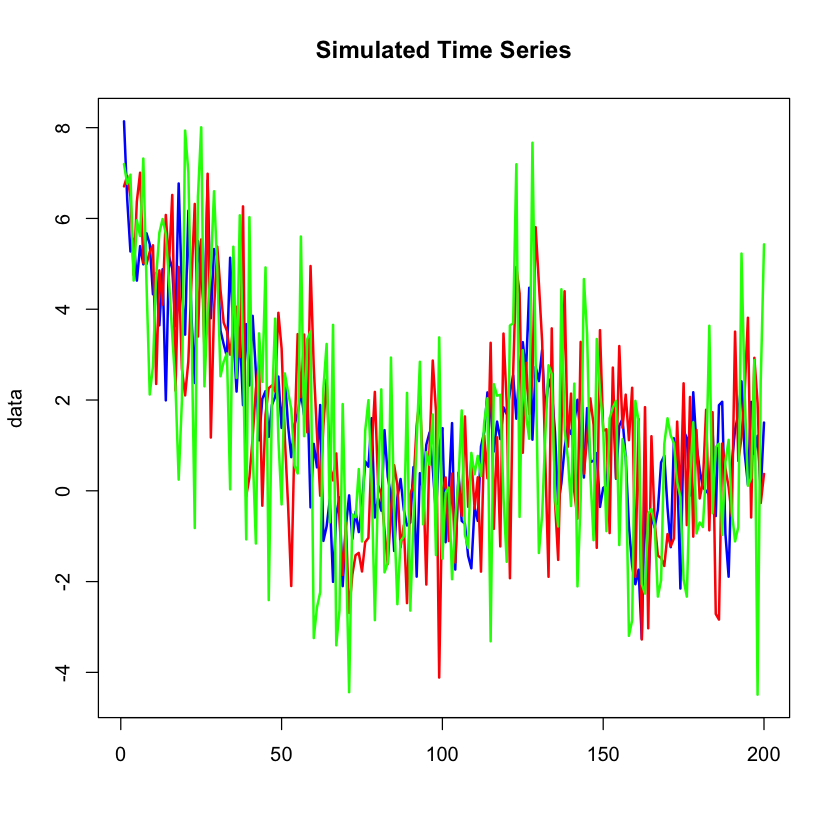

In [168]:
matplot(data,main="Simulated Time Series",col = c("blue","red","green"),type = "l",lty=1,lwd = 2)

## 3.Является ли система коинтегрированной,какой порядок коинтеграции, проверить соответсвующие гипотезы;

Воспользуемся таблицами Йехансона

In [169]:
vecm <- ca.jo(data, ecdet = "none",type="eigen",K=2,spec="longrun")
summary(vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.51730520 0.31777901 0.05239336

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 2 |  10.66  6.50  8.18 11.65
r <= 1 |  75.72 12.91 14.90 19.19
r = 0  | 144.22 18.90 21.07 25.75

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           X1.l2      X2.l2     X3.l2
X1.l2  1.0000000  1.0000000 1.0000000
X2.l2  0.9564375 -0.9048239 0.4851353
X3.l2 -2.0381133 -0.1144165 0.2344167

Weights W:
(This is the loading matrix)

           X1.l2      X2.l2       X3.l2
X1.d -0.08695465 -0.2990446 -0.06599756
X2.d -0.25724585  0.6574753 -0.03897199
X3.d  0.56897351  0.3188752 -0.07079978


In [170]:
vecm@cval

,10pct,5pct,1pct
r <= 2 |,6.50,8.18,11.65
r <= 1 |,12.91,14.90,19.19
r = 0 |,18.90,21.07,25.75


In [171]:
vecm@teststat

[1]  10.65553  75.71552 144.21740

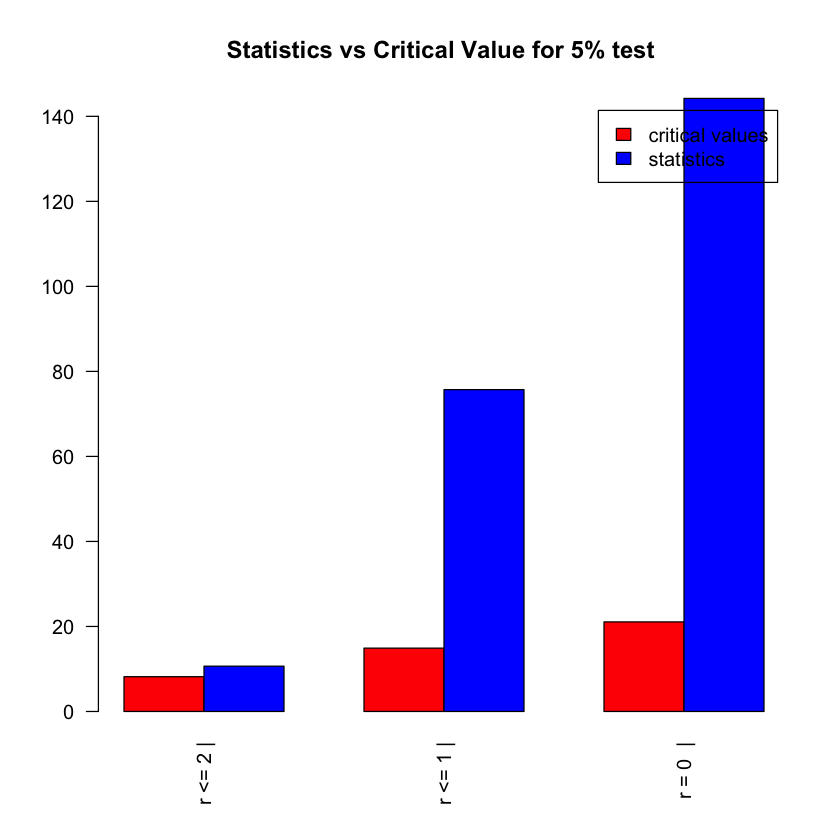

In [173]:
outmat <-rbind(vecm@cval[,2],vecm@teststat)
legends <- c("critical values", "statistics")
barplot(outmat, main="Statistics vs Critical Value for 5% test ",
        legend.text = legends, beside = TRUE, col=c("red","blue"), las=2)

Порядок коинтеграции h = 2

# 6. Показать визуально на графиках, почему порядок коинтеграции такой, а не иной.

Визуально проверим порядок коинтеграции

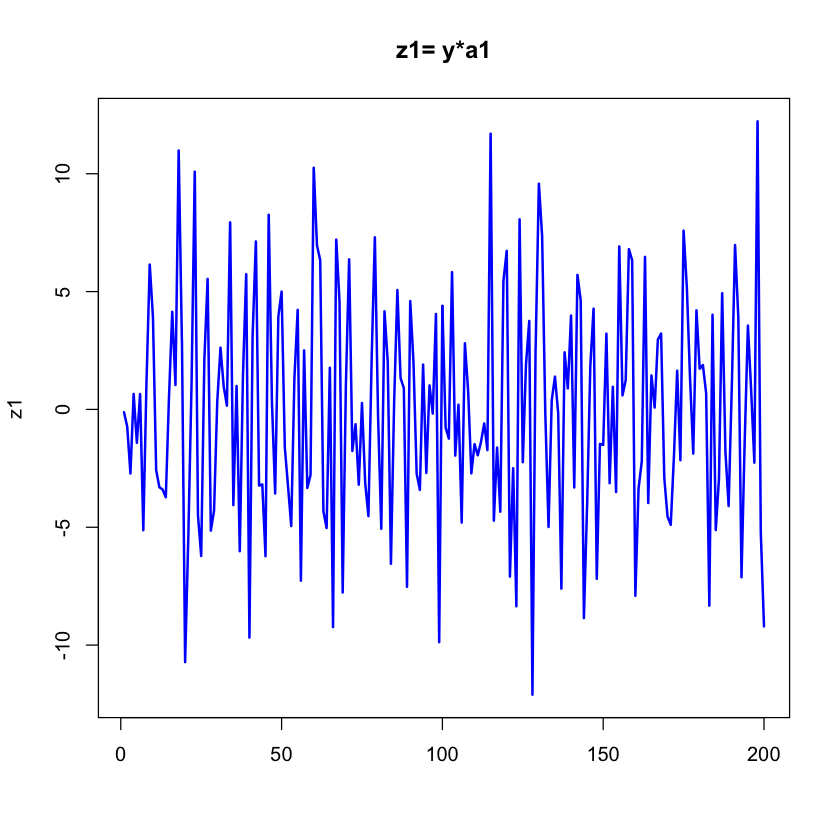

In [174]:
z1 <- data%*%vecm@V[,1]
matplot(z1,type ="l",col = "blue",lwd = 2,main ='z1= y*a1')

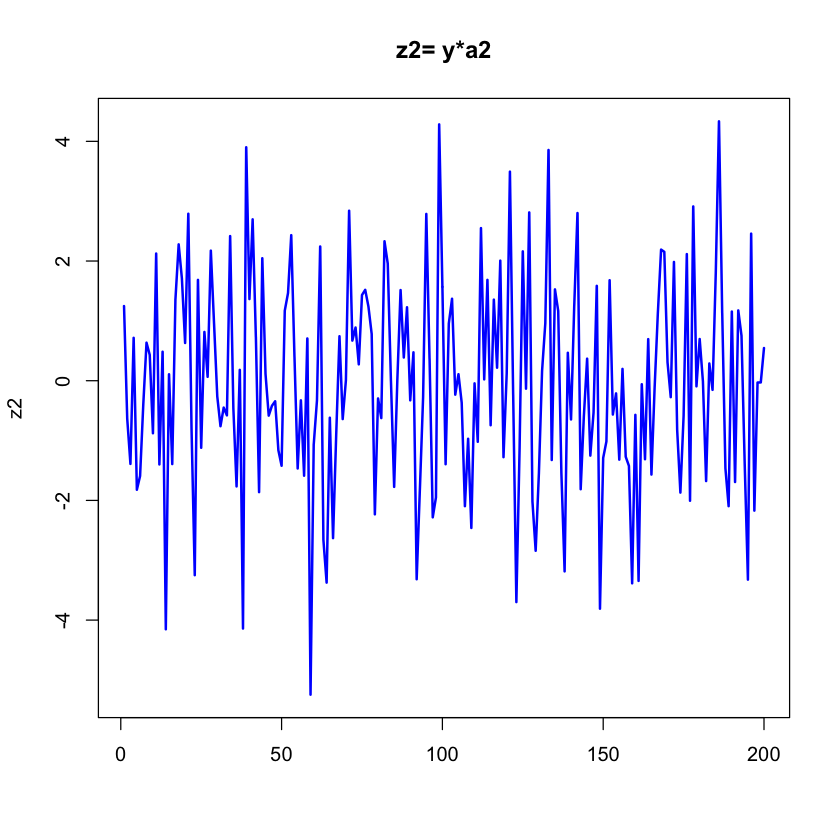

In [175]:
z2 <- data%*%vecm@V[,2]
matplot(z2,type ="l",col = "blue",lwd = 2,main ='z2= y*a2')

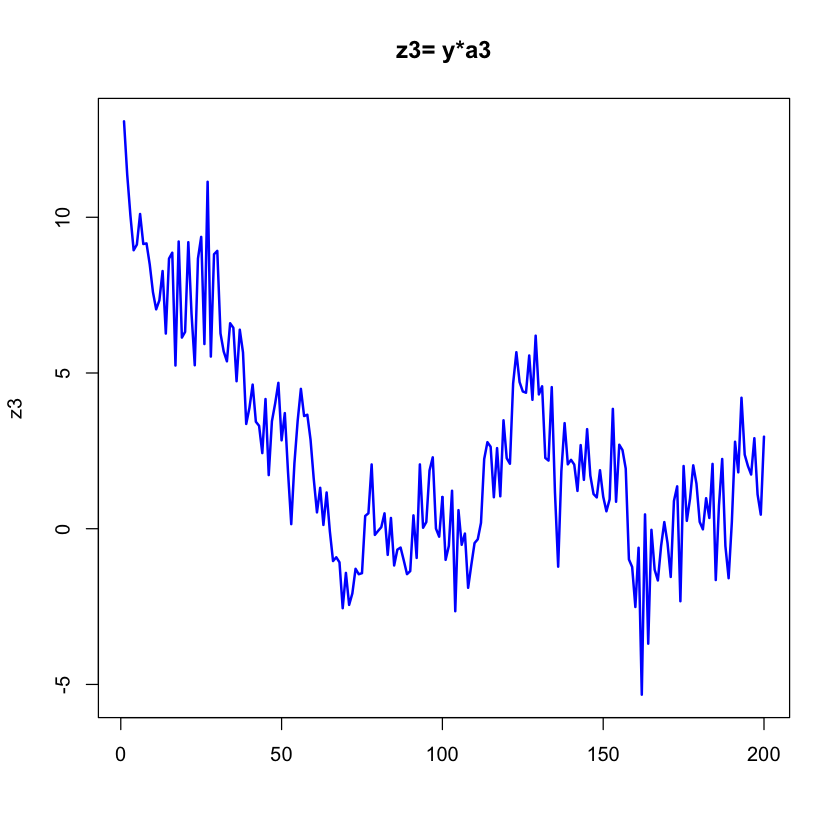

In [176]:
z3 <- data%*%vecm@V[,3]
matplot(z3,type ="l",col = "blue",lwd = 2,main ='z3= y*a3')

z3 имеет тренд и не является стационарной => порядок коинтеграции h = 2 не отвергается

## 4. Построить оценку параметров смоделированного ряда;

In [184]:
#собственные значения
vecm@lambda

[1] 0.51730520 0.31777901 0.05239336

In [181]:
#коинтегрирующие вектора
a <- vecm@V[,1:3]
a

,X1.l2,X2.l2,X3.l2
X1.l2,1.0000000,1.0000000,1.0000000
X2.l2,0.9564375,-0.9048239,0.4851353
X3.l2,-2.0381133,-0.1144165,0.2344167


In [183]:
#оценки константы
vecm@GAMMA[,1]

X1.d       X2.d       X3.d 
0.09712248 0.09742610 0.13814334

In [186]:
#оценка матрицы
vecm@GAMMA[,2:4]

,X1.dl1,X2.dl1,X3.dl1
X1.d,-0.7006473,-0.02169556,0.1109776
X2.d,0.2298970,-1.03142975,0.2981265
X3.d,0.4893284,0.02590726,-0.9541308


## 5. По оценкам построить прогноз приращений процесса на 1 шаг времени вперед

На основе 7 лекции сделаем на 5 шагов вперед

In [191]:
library(vars)

Loading required package: strucchange
Loading required package: sandwich
Loading required package: lmtest


In [189]:
data <- mAr.sim(w,phi, C, N=200)

In [193]:
varsimest <- VAR(data, p = 2, season = NULL, exogen = NULL)
summary(varsimest)


VAR Estimation Results:
Endogenous variables: X1, X2, X3 
Deterministic variables: const 
Sample size: 198 
Log Likelihood: -1048.194 
Roots of the characteristic polynomial:
0.9459 0.537 0.537 0.4272 0.2561 0.2561
Call:
VAR(y = data, p = 2, exogen = NULL)


Estimation results for equation X1: 
X1 = X1.l1 + X2.l1 + X3.l1 + X1.l2 + X2.l2 + X3.l2 + const 

      Estimate Std. Error t value Pr(>|t|)    
X1.l1  0.21515    0.07018   3.066 0.002487 ** 
X2.l1  0.11074    0.05355   2.068 0.039981 *  
X3.l1  0.18718    0.03971   4.714 4.67e-06 ***
X1.l2  0.23795    0.06967   3.416 0.000777 ***
X2.l2  0.07372    0.05090   1.448 0.149130    
X3.l2  0.10654    0.04351   2.448 0.015254 *  
const  0.56555    0.36316   1.557 0.121052    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 1.114 on 191 degrees of freedom
Multiple R-Squared: 0.729,	Adjusted R-squared: 0.7205 
F-statistic: 85.63 on 6 and 191 DF,  p-value: < 2.2e-16 


Estimation results for equ

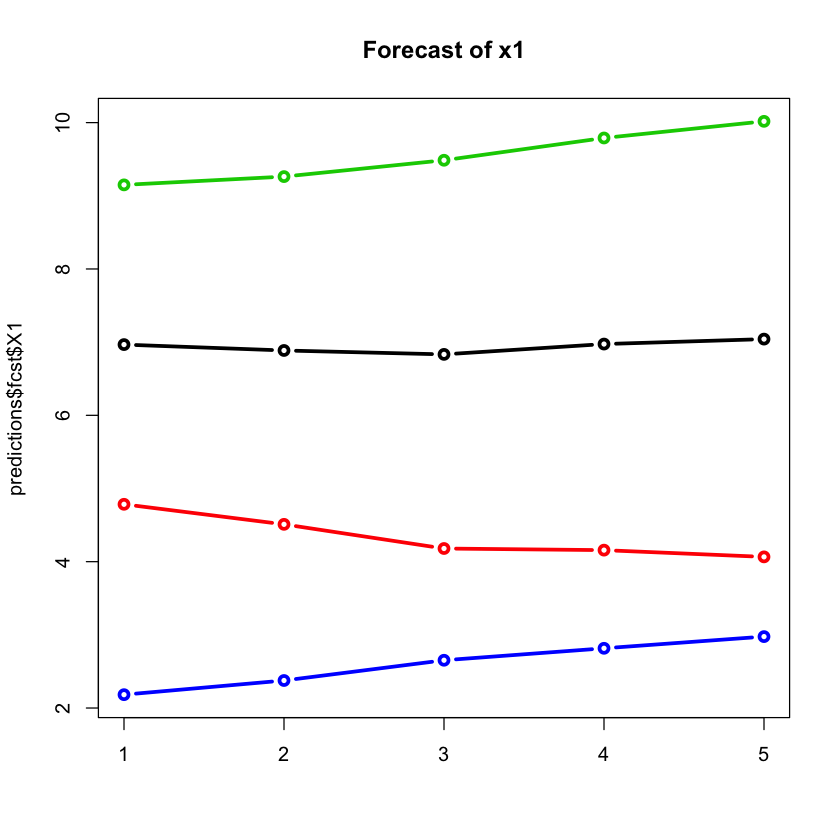

In [194]:
predictions <- predict ( varsimest , n.ahead = 5 ,ci = 0.95)
matplot(predictions$fcst$X1,type = "b",pch = 21,lty = 1,lwd = 3,main = "Forecast of x1")